In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

from matplotlib import colors, cm

In [2]:
#df_soil = pd.read_csv("/".join(["../data/raw/", dataset_name, soil_files[0]]))
df_soil = pd.read_csv('../data/raw/us-drought-meteorological-data/soil_data.csv')

In [3]:
print(df_soil.columns)
print(df_soil.iloc[0])

Index(['fips', 'lat', 'lon', 'elevation', 'slope1', 'slope2', 'slope3',
       'slope4', 'slope5', 'slope6', 'slope7', 'slope8', 'aspectN', 'aspectE',
       'aspectS', 'aspectW', 'aspectUnknown', 'WAT_LAND', 'NVG_LAND',
       'URB_LAND', 'GRS_LAND', 'FOR_LAND', 'CULTRF_LAND', 'CULTIR_LAND',
       'CULT_LAND', 'SQ1', 'SQ2', 'SQ3', 'SQ4', 'SQ5', 'SQ6', 'SQ7'],
      dtype='object')
fips             1001.000000
lat                32.536382
lon               -86.644490
elevation          63.000000
slope1              0.041900
slope2              0.278800
slope3              0.298400
slope4              0.249700
slope5              0.114200
slope6              0.017000
slope7              0.000000
slope8              0.000000
aspectN             0.103300
aspectE             0.185900
aspectS             0.200300
aspectW             0.189800
aspectUnknown       0.320700
WAT_LAND            0.997400
NVG_LAND           27.940498
URB_LAND            0.288900
GRS_LAND            2.750274
FOR_L

In [4]:
display(
    "Shape",
    df_soil.shape,
    "Description",
    df_soil.describe().round(2),
    "Duplicates",
    df_soil.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df_soil.dtypes,
        "Missing Values": df_soil.isnull().sum(),
        "Unique Values": df_soil.nunique(),
        "Sample Values": [df_soil[col].sample(3).tolist() for col in df_soil.columns]
    })


'Shape'

(3109, 32)

'Description'

,fips,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,...,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
count,3109.00,3109.00,3109.00,3109.00,3109.00,3109.00,3109.00,3109.00,3109.00,3109.00,...,3109.00,3109.00,3109.00,3109.00,3109.00,3109.00,3109.00,3109.00,3109.00,3109.00
mean,30678.54,38.28,-91.66,427.62,0.05,0.30,0.32,0.16,0.05,0.07,...,28.49,3.50,32.00,1.83,1.55,1.28,1.36,1.15,1.14,1.28
std,14986.02,4.84,11.49,500.16,0.09,0.22,0.17,0.13,0.07,0.13,...,31.84,10.29,33.10,1.19,1.02,1.00,1.03,0.92,0.91,1.02
min,1001.00,25.60,-124.21,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,19045.00,34.69,-98.05,132.00,0.01,0.11,0.19,0.04,0.00,0.00,...,0.14,0.05,1.60,1.00,1.00,1.00,1.00,1.00,1.00,1.00
50%,29213.00,38.33,-90.18,272.00,0.03,0.27,0.35,0.13,0.01,0.00,...,14.04,0.28,18.81,1.00,1.00,1.00,1.00,1.00,1.00,1.00
75%,46009.00,41.70,-83.37,483.00,0.07,0.48,0.46,0.26,0.09,0.05,...,51.74,1.37,60.64,3.00,2.00,1.00,1.00,1.00,1.00,1.00
max,56045.00,48.84,-67.61,3561.00,0.97,0.76,0.70,0.57,0.33,0.61,...,97.03,99.96,99.96,7.00,7.00,7.00,7.00,7.00,7.00,7.00


'Duplicates'

0

,Data Types,Missing Values,Unique Values,Sample Values
fips,int64,0,3109,"[18027, 38055, 17039]"
lat,float64,0,3109,"[41.02855, 47.464327, 36.079065]"
lon,float64,0,3109,"[-92.515977, -106.349696, -99.111085]"
elevation,int64,0,1062,"[290, 52, 17]"
slope1,float64,0,1224,"[0.0145, 0.0009, 0.0649]"
slope2,float64,0,2421,"[0.7204, 0.2458, 0.3198]"
slope3,float64,0,2400,"[0.272, 0.4511, 0.0362]"
slope4,float64,0,2024,"[0.2089, 0.2268, 0.1836]"
slope5,float64,0,1228,"[0.0, 0.0433, 0.0898]"
slope6,float64,0,1022,"[0.0, 0.0002, 0.0]"


<Axes: >

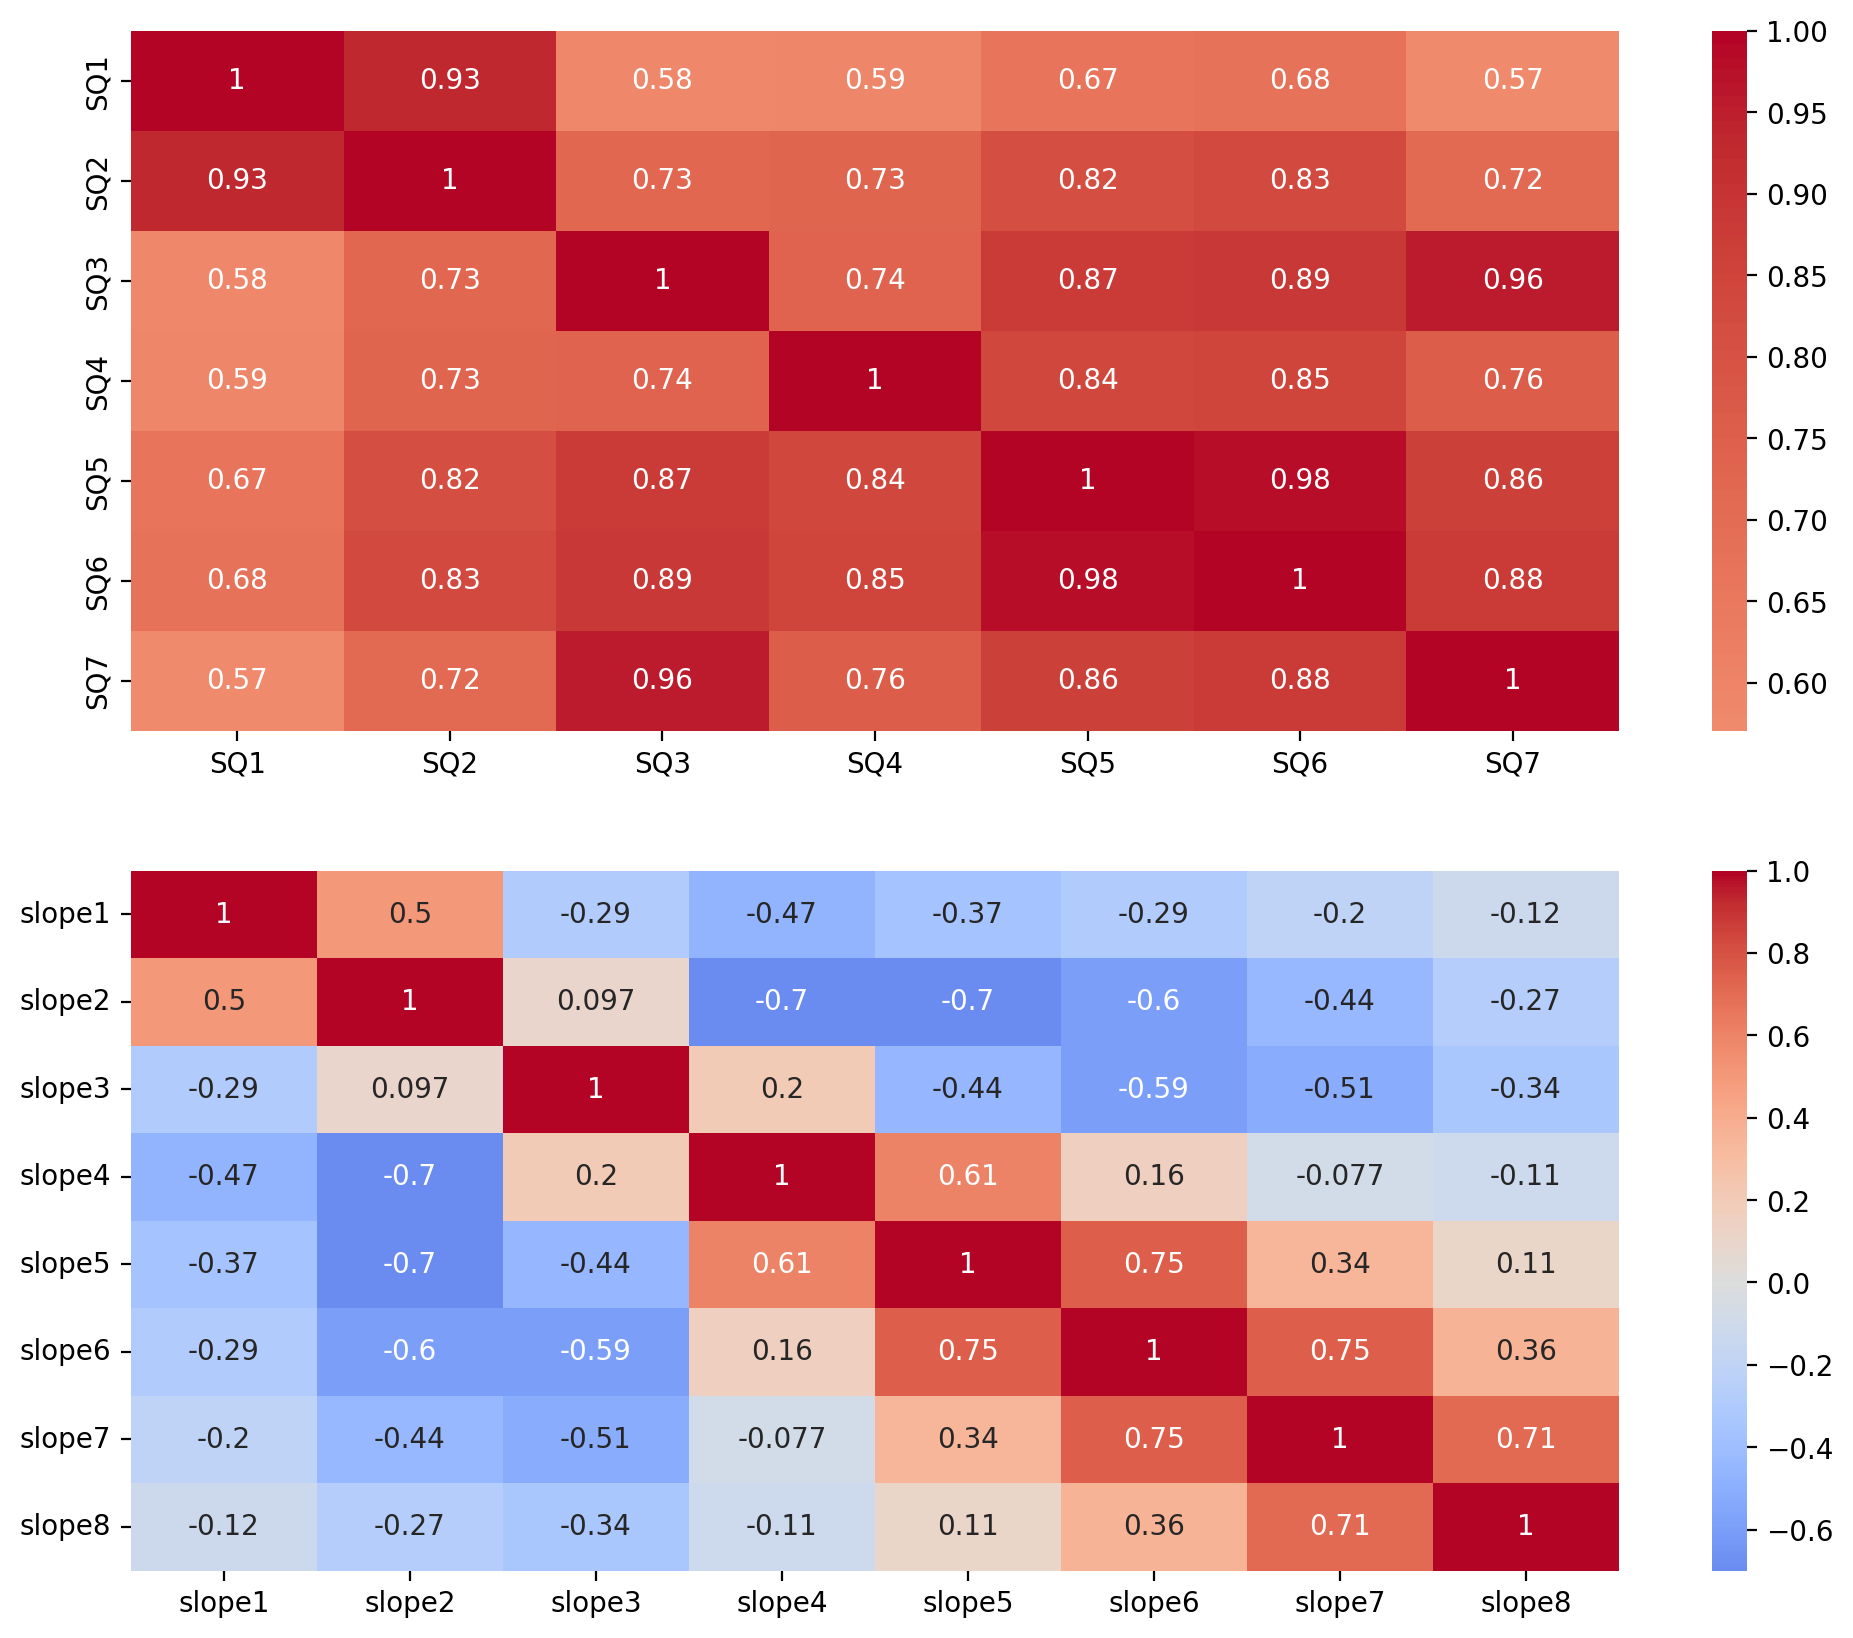

In [5]:
df_soil_qual = df_soil.loc[:, ['SQ' + str(i + 1) for i in range(7)]]
df_soil_slope = df_soil.loc[:, ['slope' + str(i + 1) for i in range(8)]]
fig, ax = plt.subplots(nrows = 2, figsize=(12, 10), dpi=200)
sns.heatmap(df_soil_qual.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, ax=ax[0])
sns.heatmap(df_soil_slope.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0, ax=ax[1])


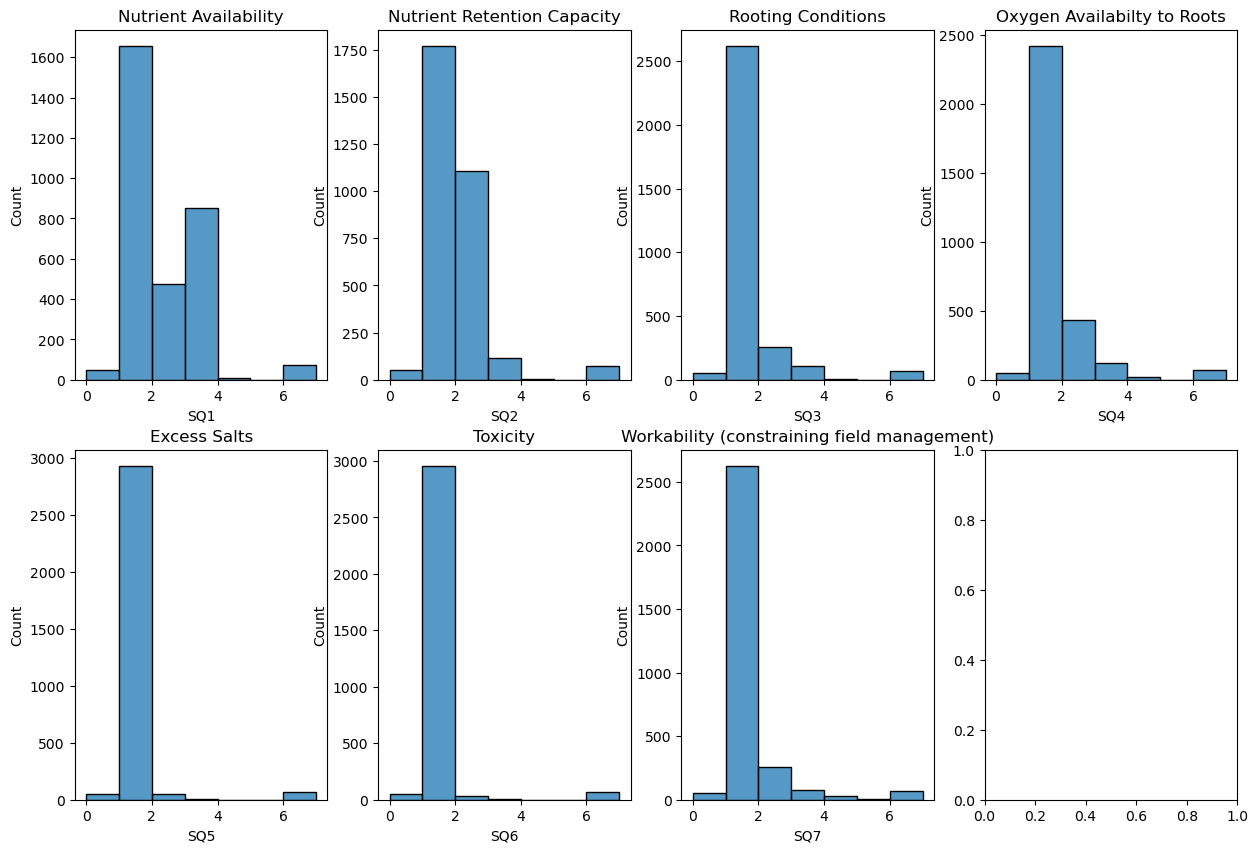

In [19]:
descriptor_list = ['Nutrient Availability', 'Nutrient Retention Capacity', 'Rooting Conditions',
                                'Oxygen Availabilty to Roots', 'Excess Salts', 'Toxicity',
                                'Workability (constraining field management)']

fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = [15, 10])
for i in range(7):
    sns.histplot(df_soil['SQ{}'.format(str(i + 1))], binwidth = 1, ax = ax[i//4, i%4])
    ax[i//4, i%4].set(title = descriptor_list[i])

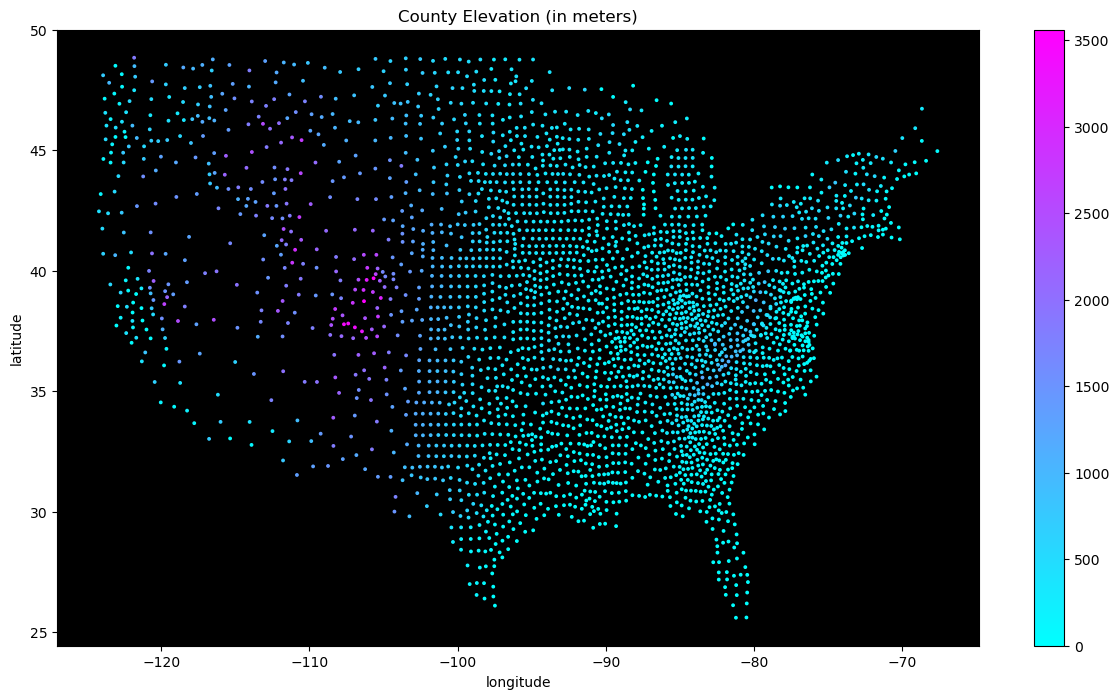

In [52]:
plt.figure(figsize=(14, 8))
plt.title('County Elevation (in meters)')
plt.xlabel('longitude')
plt.ylabel('latitude')

plt.scatter(df_soil.lon, df_soil.lat, c=df_soil.elevation, s=3, cmap='cool')
plt.gca().set_facecolor('black')
plt.colorbar(fraction = 0.1)

[Text(0.5, 1.0, 'Average Slope')]

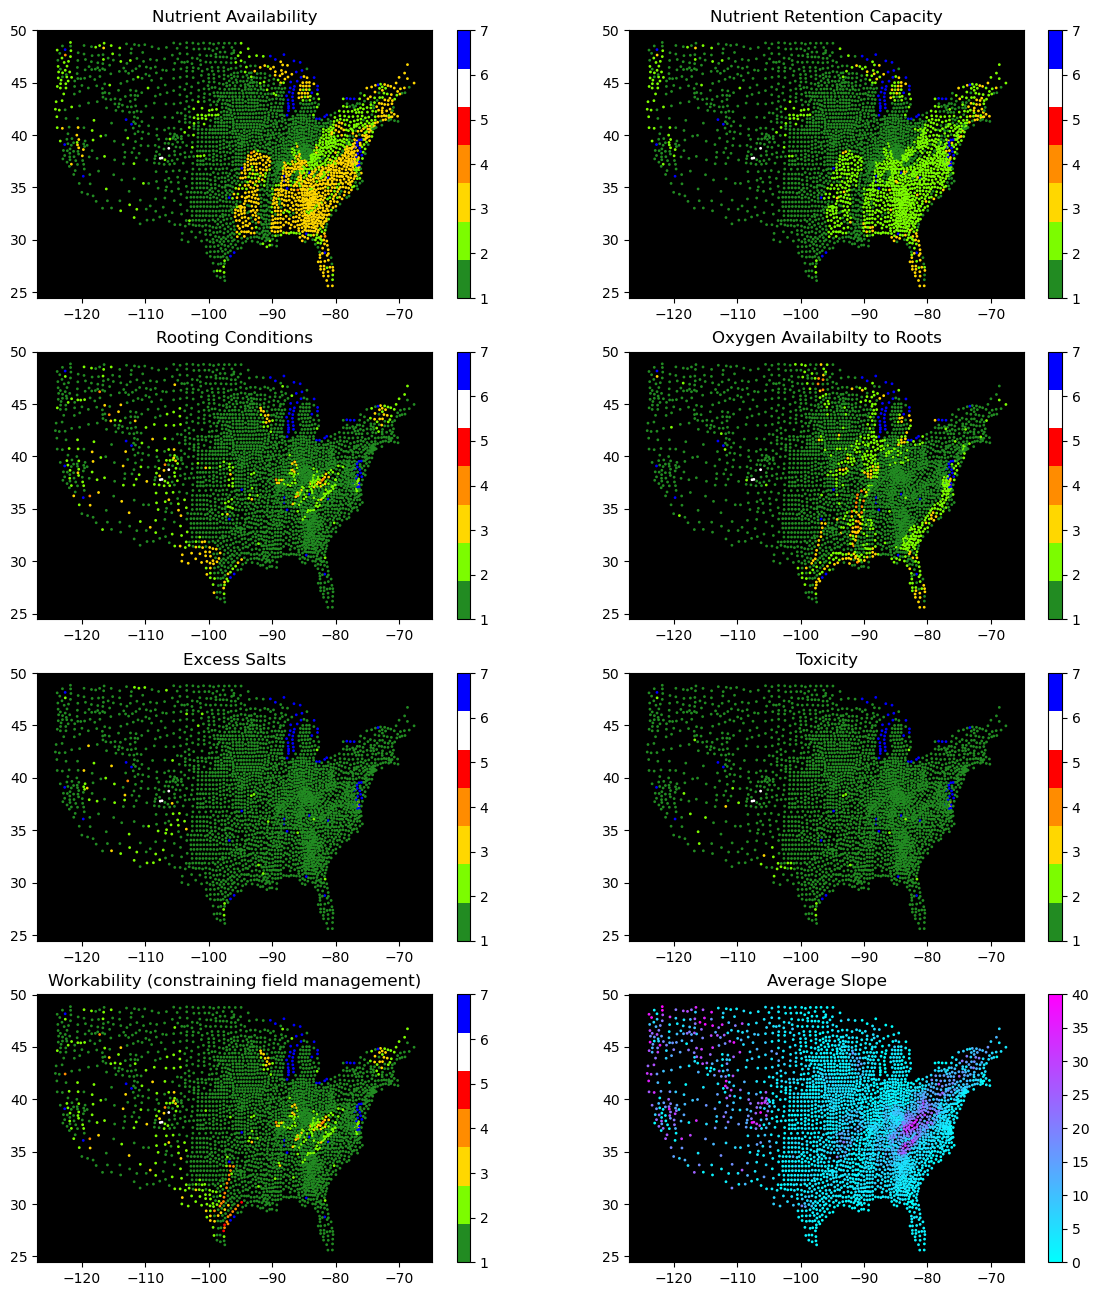

In [69]:
#slopes are discretized with each of the 8 categories representing a range, here the middle values are used
slope_categories = [0.25, 1.25, 3.5, 7.5, 12.5, 22.5, 37.5, 45]
#av_slope = [df_soil.loc[county, 'slope1':'slope8'].mean() for county in range(len(df_soil))]
av_slope = []
for county in range(len(df_soil)):
    county_slope = 0
    for cat in range(8):
        county_slope += df_soil.loc[county, 'slope{}'.format(str(cat + 1))] * slope_categories[cat]
    av_slope.append(county_slope)

fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize=(14, 16))
c = colors.ListedColormap(['forestgreen', 'lawngreen', 'gold', 'darkorange', 'red', 'white', 'blue'])
n = colors.Normalize(vmin=1,vmax=7)

for i in range(7):
    ax[i//2, i%2].scatter(df_soil.lon, df_soil.lat, c=df_soil.loc[:, 'SQ{}'.format(str(i + 1))], s=1, cmap = c, norm = n)
    ax[i//2, i%2].set_facecolor('black')
    plt.colorbar(cm.ScalarMappable(norm=n, cmap=c), ax = ax[i//2, i%2])
    ax[i//2, i%2].set(title = descriptor_list[i])
ax[3, 1].scatter(df_soil.lon, df_soil.lat, c = av_slope, s=1, cmap = 'cool')
ax[3, 1].set_facecolor('black')
sm = cm.ScalarMappable(cmap = 'cool')
sm.set_clim(0, 40)
plt.colorbar(sm, ax = ax[3, 1])
ax[3, 1].set(title = 'Average Slope')

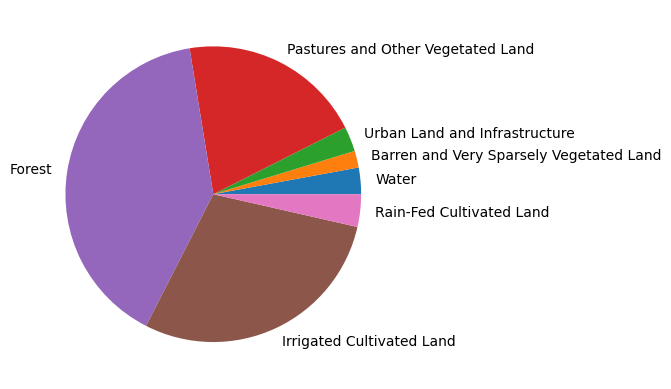

In [84]:
land_cover_params = ['WAT_LAND', 'NVG_LAND', 'URB_LAND', 'GRS_LAND', 'FOR_LAND', 'CULTRF_LAND', 'CULTIR_LAND']
land_cover_descriptions = ['Water', 'Barren and Very Sparsely Vegetated Land', 'Urban Land and Infrastructure',
                           'Pastures and Other Vegetated Land',  'Forest', 'Irrigated Cultivated Land',
                          'Rain-Fed Cultivated Land']
av_land_cover = [df_soil.loc[:, land_cover].mean()/100 for land_cover in land_cover_params]

plt.pie(av_land_cover, labels = land_cover_descriptions)
plt.show()

0.984302128763356